# Second Assignement

* Timo Blattner
* 19-115-351
* [https://github.com/TimoBl/DIA_assignements](https://github.com/TimoBl/DIA_assignements)

In [47]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math
import os

## Algorithms

I will evaluate the same functions I used previously

In [36]:
def nearest_neighbour(img, shape):
    (h, w, c) = img.shape # old shape
    (H, W, C) = shape # new shape
    
    new_img = np.zeros((H, W, C))
    
    for y in range(1, H-2):
        for x in range(1, W-2):

            # conversion from new image space to old image space
            nx, ny = x * w/W, y * h/H

            # lower and upper corner in x
            x1, x2 = math.floor(nx), math.ceil(nx+0.00001) 
            y1, y2 = math.floor(ny), math.ceil(ny+0.00001) 

            # select closest corner
            i = np.argmax([abs(nx - x1), abs(nx - x2)])
            j = np.argmax([abs(ny - y1), abs(ny - y2)])

            # and add it to image
            new_img[y, x, :] = img[y1 + i, x1 + j, :]
            
    print("ended")
    return np.asarray(new_img, dtype=np.uint8)

In [44]:
def bilinear(img, shape):
    (h, w, c) = img.shape # old shape
    (H, W, C) = shape # new shape
    
    new_img = np.zeros((H, W, C))

    for y in range(0, H-2):
        for x in range(0, W-2):

            nx, ny = x * w/W, y * h/H

            x1, x2 = math.floor(nx), min(math.ceil(nx+0.0001), W-1)
            y1, y2 = math.floor(ny), min(math.ceil(ny+0.0001), H-1)

            a = img[y1, x1, :] * (x2 - nx) * (y2 - ny)
            b = img[y1, x2, :] * (nx - x1) * (y2 - ny)
            c = img[y2, x1, :] * (x2 - nx) * (ny - y1)
            d = img[y2, x2, :] * (nx - x1) * (ny - y1)

            if (x1 != x2 and y1 != y2):
                new_img[y, x, :] = (a + b + c + d) / ((x2 - x1) * (y2 - y1))
            
    print("ended")
    return np.asarray(new_img, dtype=np.uint8)

## Helper Functions

In [122]:
# get image from array
def get_img(arr):
    return Image.fromarray(np.asarray(arr, dtype=np.uint8), 'RGB')

In [10]:
# load images in directory
def load_imgs(directory):
    images = []
    for file in os.listdir(directory):
        if file.endswith(".jpg"):
            images.append(np.array(Image.open(os.path.join(directory, file))))
    return images

In [39]:
# get the double size
def dbl(img):
    shape = img.shape
    return (2*shape[0], 2*shape[1], shape[2])

## Images

We are first loading the images

In [131]:
images = load_imgs("Images")
images_orig = load_imgs("Image_original_size")

Applying both of our algorithms (which may take some calculation time)

In [38]:
nearest_up = [nearest_neighbour(img, dbl(img)) for img in images]

ened
ened
ened


In [45]:
bilinear_up = [bilinear(img, dbl(img)) for img in images]

ended
ended
ended


## First observation

so we will now choose a small part of the image to look at the quality

In [57]:
a, b, c, d = 100, 150, 100, 150

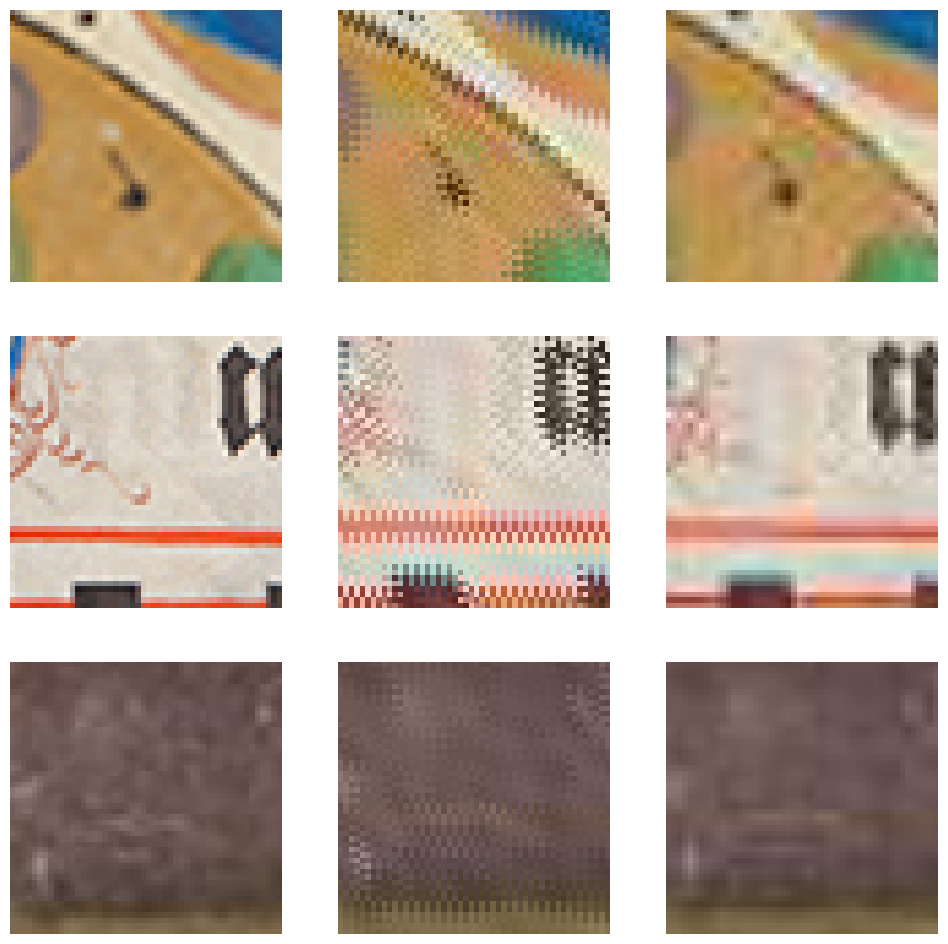

In [150]:
fig, axs = plt.subplots(len(images), 3, figsize=(12, 12))
for i in range(len(images)):
    
    # original
    axs[i][0].imshow(get_img(images_orig[(i+2)%3][a:b, c:d])), axs[i][0].axis("off")
    
    # neareast
    axs[i][1].imshow(get_img(nearest_up[i][a:b, c:d])), axs[i][1].axis("off")
    
    # bilinear
    axs[i][2].imshow(get_img(bilinear_up[i][a:b, c:d])), axs[i][2].axis("off")

we see a vast quality difference between the images with the left being the original image. The nearest neighbour in the mittle is showing high spikes (maximas). The right, the bilinear interpolation, showing really smoothed images which approximates quite well the pattern in the original image, however a bit more smoothed and without the amount of detail.

# Substraction

We compare two images by doing the absolute of the subtraction of the two color vector (R, G, B) for each pixel in the image

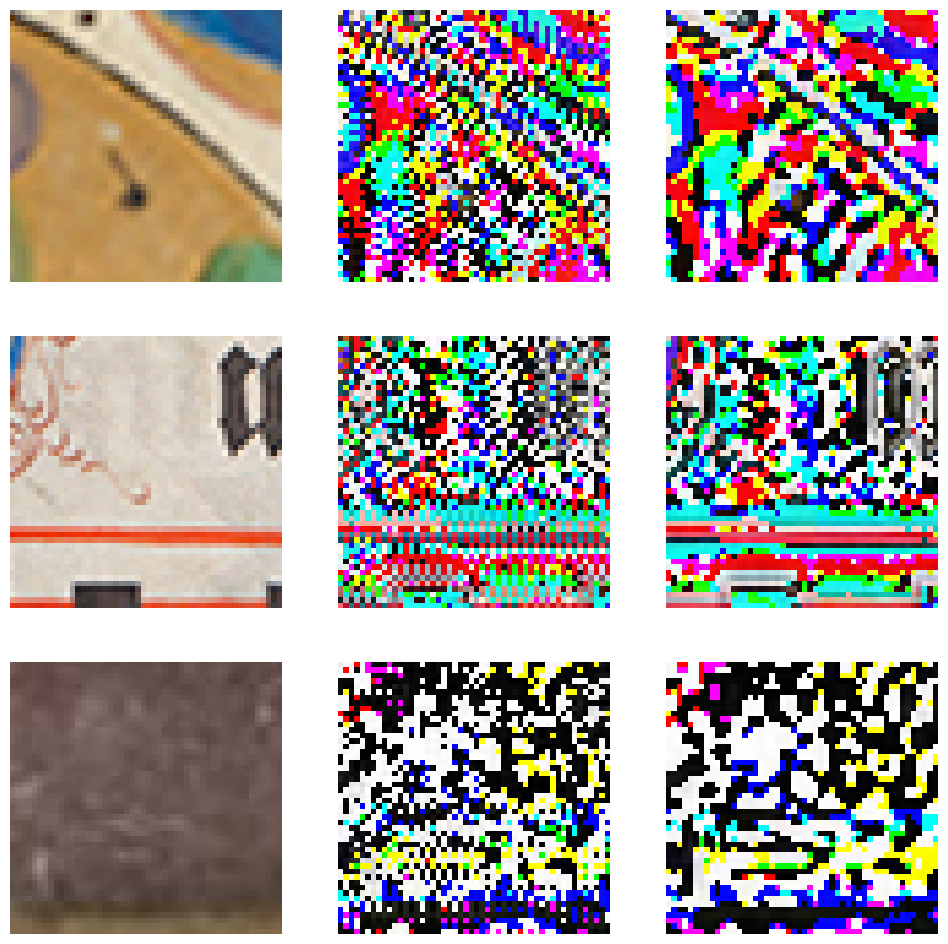

In [153]:
fig, axs = plt.subplots(len(images), 3, figsize=(12, 12))
for i in range(len(images)):
    
    # original
    axs[i][0].imshow(get_img(abs(images_orig[(i+2)%3])[a:b, c:d])), axs[i][0].axis("off")
    
    # neareast
    axs[i][1].imshow(get_img(abs(nearest_up[i] - images_orig[(i+2)%3])[a:b, c:d])), axs[i][1].axis("off")
    
    # bilinear
    axs[i][2].imshow(get_img(abs(bilinear_up[i] - images_orig[(i+2)%3])[a:b, c:d])), axs[i][2].axis("off")

Here we see the same pattern as we observed previously, the nearest neighbour upsampling is really noisy and struggles with patterns, especially lines. The bilinear algorithm on the otherhand is able to approximate the contours quite a lot better a more smooth. 

## Signal to noise ratio

We will now calculate the signal to noise ratio for each of those images, with both upsampling methods again

In [146]:
for i in range(len(images)):
    
    P_signal = np.mean(images_orig[(i+2)%3])
    P_noise_nearest = np.mean((images_orig[(i+2)%3] - nearest_up[i])**2)
    P_noise_bilinear = np.mean((images_orig[(i+2)%3] - bilinear_up[i])**2)
    
    SNR_nearest = math.log(P_signal / P_noise_nearest, 10)
    SNR_bilinear = math.log(P_signal / P_noise_bilinear, 10)
    
    print(SNR_nearest, P_noise_bilinear)

0.3235796695448091 65.84238644444444
0.3740467079117679 73.39241790123457
0.6160394499391885 32.52919294021294


First of we see that there isn't so much difference between images as there is between both of the algorithm. The bilinear upsampling has vastly a better signal to noise ratio which is also reflected in the better images the algorithm produces. The nearest neighbour on the other hand is a maxima algorithm, so it will always produce "spiky" results and as such lead to more noise and lower signal to noise ratio.